# GEOGM0058 Practical 4: Population Dynamics

This practical is based on some simple ecology models. The models are
not especially realistic, but illustrate some ideas that crop up in many
fields: exponential growth and decay, equilibrium, and stability.

Before you begin this practical you should be familiar familiar with the idea that many models are based on *differential equations*: for example, that the population $x$ of a species would grow (or shrink) with time $t$ according to the equation

$$ \frac{ {\rm d} x}{ {\rm d} t } = (B - D) x$$ 

here $B$ is the birth rate (the number of births per head of population) and $D$ the death rate.

The final exercise is based on Lau 2022,   which is in turn based on a modified set of predator-prey equations
due to Arditi and Akçakaya 1990 and discussed in Hadjimicheal et al 2020

## References

Arditi, R.,  Akçakaya, H. R. (1990). Underestimation of Mutual Interference of Predators. Oecologia, 83(3), 358–361. http://www.jstor.org/stable/4219345

Lau, L. (2022), Fisheries Training 0: Exploring Predator-Prey Dynamic. https://waterprogramming.wordpress.com/2022/07/11/. Retreived 21/12/2022

Hadjimichael, A., Reed, P., & Quinn, J. (2020). Navigating Deeply Uncertain Tradeoffs in Harvested Predator-Prey Systems. Complexity, 2020, 1-18. https://doi.org/10.1155/2020/4170453


## Exercise 4.1: Exponential growth and decay

Imagine a species of bacteria, fish, rabbits, or similar, whose  population $x$ grows according to the following assumptions.
1. There are no limits to growth: this is approximately true when the population is small.
2. For every $x$ head of population, there are $Bx$ births per unit time, and $Dx$ deaths. Here we are ignoring seasons
and the time between birth and maturity. This is adequate if we are looking at long time scales, i.e many generations.

If 1. and 2. hold, we can say that the rate-of-change with time of the population is proportional to the population. That is

$$ \frac{ {\rm d} x}{ {\rm d} t } = a x$$  

where $a = B - D$. This is a common equation. For example it can also be used to model radioactive decay (with $a < 0$) and atmospheric pressure.

If we know the population $x$ at any one time, then we have an *initial value problem*, just as in practical 3. We will assume that we measure the population at $x(t = 0) = x_0$. We can find numerical solutions as before. It also has a well known *analytic* solution:

$$ x = x_0 e^{at} .$$

The formula $ x = x_0 e^{at}$ describes exponential growth (if $a > 0$, births outnumber deaths) or decay (if $a < 0$, deaths outnumber births). If you have not encountered $e$ before, it is known as 'the base of natural logarithms', and it is an irrational number (like $\pi$).
All scientific programmimng systems provide a function (usually called ```exp```) to evaluate $e^{z}$ for real (and indeed complex) numbers $z$ . Note that the formulae $ x = x_0 2^{at}$ and $ x = x_0 10^{at}$ also describe exponential growth/decay. In fact, they are all closely related. For example $e^{at} = 2^{at/{\ln{2}}}$ where $\ln$ is the natural logarithm function.

Exponential growth and decay have two stand-out features
1. The rate-of-change (with respect to e.g time) in the variable $x$  is proportional to $x$ (as in the differential equation above).
2. Growth (decay) is characterised by a doubling time (half-life) $\lambda$. If $x$ doubles from $x_0$ to $2x_0$ between
time $t = 0$ and $t = \lambda$, then at $t = 2 \lambda$, $x = 4x_0$ and at $t = 3 \lambda$, $x = 8x_0$.
Any other kind of growth is not exponential, at least in science. In everyday language 'exponential growth' is 
often used to simply mean 'rapid growth' or even 'growing growth'. 

## Question 4.1. 

The code cell below plots several growth curves for $x(t)$. Which ones
show exponential growth or decay? Complete the table below. 

| Growth curve | Exponential? |Doubling time / half life |
|--------------|--------------|---------------------------|
| A            | Yes          | 1 year                    |
| B            | No           | N/A                       |
| C            |              |                           |
| D            |              |                           |
| E            |              |                           |



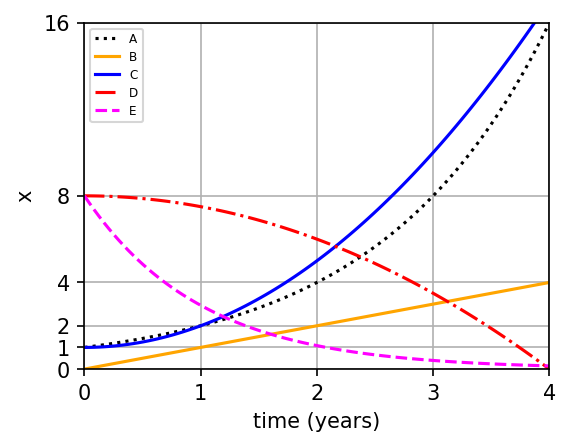

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

t = np.linspace(0, 4, 96)
yE = scipy.integrate.solve_ivp(lambda t,y:-y, (0,4), [8], t_eval=t).y[0]
yD = scipy.integrate.solve_ivp(lambda t,y:-t, (0,4), [8], t_eval=t).y[0]
fig = plt.figure(figsize = (4,3), dpi = 150)
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, 2**t, label = 'A', color='black', ls=':')
ax.plot(t, t, label = 'B', color='orange', ls='-')
ax.plot(t, t**2 + 1, label = 'C', color='blue', ls='-')
ax.plot(t, yD, label = 'D', color='red', ls = '-.')
ax.plot(t, yE, label = 'E', color='magenta', ls ='--')
ax.set_ylim(0,16)
ax.set_xlim(0,4)
ax.set_xticks([0,1,2,3,4])
ax.set_yticks([0,1,2,4,8,16])
ax.grid()
ax.set_xlabel('time (years)')
ax.set_ylabel('x')
ax.legend(loc='upper left', fontsize='xx-small')

## Exercise 4.2. Stable and unstable equilibrium

Exponential growth ad infinitum is clearly unrealistic: eventually the population would outgrow the resources available. A simple improvement to the model
of Exercise 4.1 introduces a carrying capacity, $K$. The population $x$ grows according to the *logistic growth model*:

$$ \frac{ {\rm d} x}{ {\rm d} t } =  ax (1 - \frac{x}{K}) \rm{.}$$ 

Note that we now have nonlinear equation.

At this point, we can introduce the idea of *equilbrium*. Equilibrium requires $x$ to be constant in time: $ \frac{ {\rm d} x}{ {\rm d} t } = 0$. 
An equilibrium can be either *stable* or not. To decide which, consider a system that begins in equilibirum, and then *perturbed*, for
example by an extra birth or death. The system will tend to return toward a stable equilibrum at a rate that shrinks and move 
away from an unstable equilibrium (at a rate that grows). 

There are two equilibrium states for the logistic growth model: one where $x = 0$, and another where $x = K$. The code cell below plots numerical solutions to the 
with different initial values $x_0$. For the first 4 years, the populations evolve according to the model. 
At $t = 4$ each population is perturbed ($x$ is increased by a given number). From $t = 4$ to $t = 8$, $x$ evolves according to the
model again.

## Question 4.2a

Which of the two equilibrium states is stable and which is unstable? Justify your answer using the figure below.

## Question 4.2b

What happens if the initial population $x$ is greater than the carrying capacity $K$?

## Question 4.2c

How do the equilibrium states change if $a < 0$? Try $a = -1$ below. 


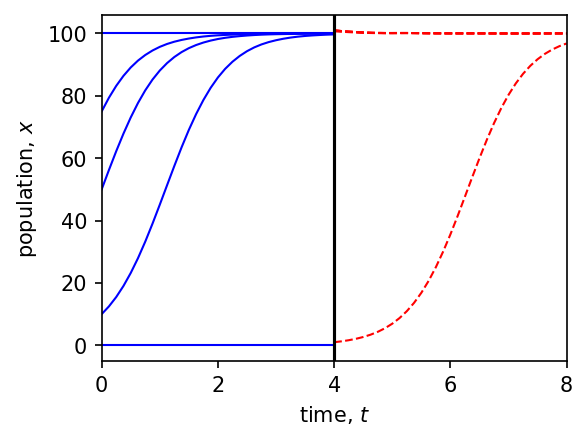

In [20]:
def logistic_model(K, a, x_0, t_0, t_n, n_sub):
       
    def rhs_logistic_growth(t, x):
        return a* x * (1.0 - x/K)
    
    t = np.linspace(t_0, t_n, n_sub + 1)
    sol = scipy.integrate.solve_ivp(rhs_logistic_growth, (np.min(t), np.max(t)), [x_0],  t_eval=t)
    return sol.t, sol.y[0]
   
    
K = 100
initial_values = [0, 10, 50, 75, K]
a = 2
t_start = 0.0
t_end = 8.0
perturb = 1

fig = plt.figure(figsize=(4,3), dpi = 150)
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(t_start, t_end)
ax.set_xlabel(r'time, $t$')
ax.set_ylabel(r'population, $x$')

for x_0 in initial_values:
    t, x = logistic_model(K, a, x_0 , t_start, 0.5*t_end, 32)
    ax.plot(t, x, 'b-', lw = 1)
    #apply perturbation
    x_0 = x[-1] + perturb
    tc, xc = logistic_model(K, a, x_0 , 0.5*t_end, t_end, 32)
    ax.plot(tc, xc, 'r--', lw = 1)

ax.axvline(0.5*t_end, color = 'k')

## Exercise 4.3 : Predator-prey equations.

Predator-prey equations attempt to model ecological systems made up (duh!) of predator and prey species. For simplicity
we will think only about one of each: pick your favourite from wolves and rabbits, amoebae and bacteria, tuna and herring, herring and krill, 
polar bears and penguins. Whichever you choose will be presented by a prey population density $x(t)$ and a predator population density $y(t)$ that vary in time $t$. 
The best known and simplest predator-prey model is based on the Lotka-Volterra equations, dating from the late 19th and early 20th century: 

$$ \frac{ {\rm d} x}{ {\rm d} t } = a x - b x y$$

and

$$ \frac{ {\rm d} y}{ {\rm d} t } = c b x y - d y$$

together with initial populations $x(t = 0) = x_0$ and $y(t = 0) = y_0$. The terms involving $xy$ measn that these two equations 
are *coupled*: we have to find solutions $x(t)$ and $y(t)$ that satisfy both simultaneosuly. They are also nonlinear (again due to the $xy$ terms).

The table below lists the parameters $a, b, c, d$.
|Parameter|Description|Unit|
|-|-|-|
|x|Prey species population density | X (e.g count per unit volume)|
|y|Predator species population density | X |
|a|Prey species growth rate. The rate of prey growth in the absence of predators. | 1/T (e/g 1/year) |
|b|Coefficient of predation. The fraction of the prey population killed by a single predator per unit time  | 1/(TX) |
|c|Predator efficiency. Predator births per prey consumed | 1 |
|d|Predator death rate | 1/T |

### Equilibrium prey and predator populations.

The prey population is in equilibrium only if $a x - b x y$. That will be the case if (and only if) $x = 0 $ or $y = a/b$. The predator
population is in equilibrium only if $c b x y - d y$, which means that $y = 0$ or $x = d/cb$. The whole system is
in equilibrium when both conditions are satisfied, so that we have two equilibrium states.
1. $x = 0$ and $y = 0$ .
2. $x = d/cb$ and $y = a/b$.

The code cell below calculates a solution to the  Lotka-Volterra equations with initial conditions
given by 2. Run it to see that the prey and predator populations plotted in the figure's left hand 
panel do not change over time. 

Now modify the code to set `PERT_X = 200` and run the cell again. The prey population
starts with the value $x_0 = d/cb + 200$. Rather than tending to either equilibrium, the
prey and predator populations oscillate. Notice that the oscillations are 90 degrees out of phase:
the predator population changes most quickly when the prey population is at one or the other extreme 
but is not changing, while the prey population grows changes most quickly when the predator population is at its 
extremes but is not changing.

The right-hand panel plots predator against prey population. It is called a 'phase-plane' diagram.
It summarizes the key points of the time series. The *trajectory* has a roughly circular shape because the oscillations
in $x$ and $y$ are 90 degrees out of phase. The straight lines representing $x = d/cb$ and $y = a/b$ are 
also plotted: equilibrium point 2 is located at their intersection. The trajectory
intersects them at its extreme values of $x$ and $y$. You can also see that he amplitude of the oscillation
is neither growing nor decaying. For example, if the oscillations were decaying the trajecory would
spiral inward. The trajectory is a *closed orbit*. 

Try a few values for `PERT_X`: you should see several closed orbits.


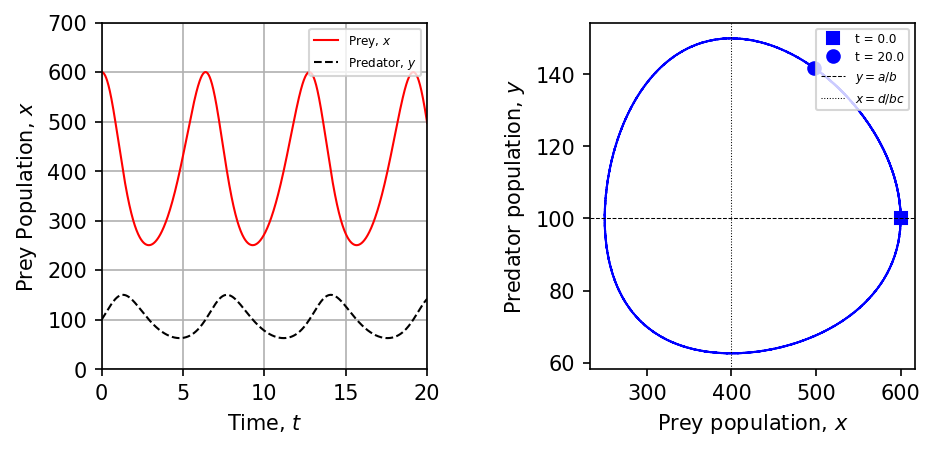

In [23]:
A = 1.0 # prey reproduction rate (birth - non-predation death)
B = 0.01 # each predator eats ? prey per unit time
C = 0.25 # predators produce ? offspring per prey eaten per unit time
D = 1.0 # death rate of predators in absence of prey

PERT_X = 200 # perturbation to initail prey population

def lv_pp_model(t_span, x_y_initial, parameters, max_step=0.02):
    """ solve the Lotka_Volterra IVP """   
    def dxdt_lv_pp(t, xv, a, b, c, d):
        """  dx/dt: Lotka-Volterra predator-prey equations """
        x, y = xv    
        dxdt = a*x - b*x*y 
        dydt = c*b*x*y - d*y
        return (dxdt, dydt)
    
    sol = scipy.integrate.solve_ivp(dxdt_lv_pp, t_span, 
                                    x_y_initial, args=parameters, max_step=max_step)
    return sol.t, sol.y[0], sol.y[1]


time_span = (0,20)
x_y_initial = (D/(C*B) + PERT_X , A/B)
param_vector = (A, B, C, D)
t, x, y = lv_pp_model(time_span, x_y_initial, param_vector)    

fig = plt.figure(figsize=(7,3), dpi = 150)

#Time series
ax_t = fig.add_subplot(1, 2, 1)
ax_t.plot(t, x, 'r-', label=r'Prey, $x$',lw=1)       

ax_t.set_xlabel(r'Time, $t$')
ax_t.set_ylabel(r'Prey Population, $x$')
ax_t.plot(t, y, 'k--', label=r'Predator, $y$',lw=1)
ax_t.legend(loc='upper right', fontsize='xx-small')
ax_t.set_ylim(0, np.max([x,y]) + 100)
ax_t.set_xlim(time_span)
ax_t.grid()

#Phase plane diagram
ax_p = fig.add_subplot(1, 2, 2)      
ax_p.plot(x, y, 'b--', lw=1)
ax_p.plot(x[0], y[0], 'bs', label=f't = {t[0]}' )
ax_p.plot(x[-1], y[-1], 'bo', label=f't = {t[-1]}') 

ax_p.set_ylabel(r'Predator population, $y$')
ax_p.set_xlabel(r'Prey population, $x$')  
ax_p.axhline(A/B, color='k',ls='--',label=r'$y = a/b$', lw=0.5)
ax_p.axvline(D/(C*B), color='k',ls=':',label=r'$x = d/bc$', lw=0.5)
ax_p.legend(loc='upper right', fontsize='xx-small')   
fig.subplots_adjust(wspace=0.5)    




## Exercise 4.3b: An ensemble simulation.

In exercise 4.3a we saw that the predator-prey system was senstive to its initial conditions, apparently forever. That is in contrast to exercise 4.2, where
as time passed we approached the stable equilibrium $x = K$, no matter where we started. For this exercise, we will carry out a basic *ensemble* simulation:
we run the simulation repeatedy, starting from different initial conditions. Run the code cell below to see a phase-place diagram with many trajecotories.

### Question 4.3

Explore the impact of the parameter `PERT_X`  on the ensemble simulation. Which simulations come close to predator
extinction and which have the greatest initial prey population? Explain your observations.


running simulation 0 of 32: (x_0, y_0) = (406.97718413810105, 100.0)
final (x,y) = (403.3458597861959, 98.48722014289683)
running simulation 1 of 32: (x_0, y_0) = (469.1732216677939, 100.0)
final (x,y) = (403.7828370101483, 84.52047674203122)
running simulation 2 of 32: (x_0, y_0) = (447.9388009366474, 100.0)
final (x,y) = (412.77471654401666, 89.31097396741404)
running simulation 3 of 32: (x_0, y_0) = (418.9292848864332, 100.0)
final (x,y) = (408.4544225894803, 95.8973049975301)
running simulation 4 of 32: (x_0, y_0) = (478.2639375562215, 100.0)
final (x,y) = (396.0503317397124, 82.71818481473252)
running simulation 5 of 32: (x_0, y_0) = (471.4465650381703, 100.0)
final (x,y) = (402.0712315484092, 84.04815182781493)
running simulation 6 of 32: (x_0, y_0) = (426.75491600940217, 100.0)
final (x,y) = (411.0178196853116, 94.16854073182974)
running simulation 7 of 32: (x_0, y_0) = (401.02494775714194, 100.0)
final (x,y) = (400.4987502024116, 99.77653449491226)
running simulation 8 of 32: (

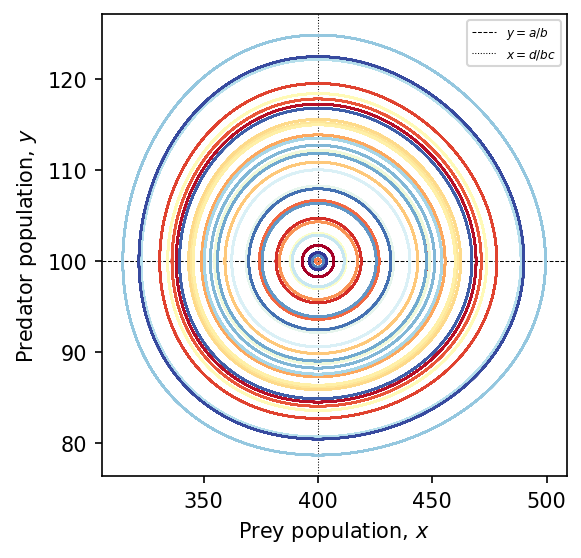

In [25]:
#redefine the coefficients
A = 1.0 # prey reproduction rate (birth - non-predation death)
B = 0.01 # each predator eats ? prey per unit time
C = 0.25 # predators produce ? offspring per prey eaten per unit time
D = 1.0 # death rate of predators in absence of prey
PERT_X = 100
PERT_Y = 0

import matplotlib as mpl


def pp_ensemble_ivp(model, time_span, param_vector, n_members, x_span, y_span, ax=None):
        
    #color map
    cmap = mpl.colormaps['RdYlBu'](np.linspace(0,1,n_members))
    # generate random initial conditions
    gen = lambda span: span[0] + np.random.rand(n_members) *(span[1] - span[0])
    x_e, y_e = gen(x_span), gen(y_span)
    
    final_x, final_y = np.empty(n_members), np.empty(n_members)
    
    
    for k, (x_0, y_0, color) in enumerate(zip(x_e, y_e, cmap)):
        print (f'running simulation {k} of {n_members}: (x_0, y_0) = {(x_0, y_0)}')
        t, x, y = model( time_span, (x_0, y_0), param_vector)
        final_x[k], final_y[k] = x[-1], y[-1]
        print (f'final (x,y) = {final_x[k], final_y[k]}')
        if (ax):
            ax.plot(x,y, color=color, lw=1)
            #ax.plot(x[0], y[0], 's', color=color, ms=3)
    
    return final_x, final_y
    
    
time_span = (0,200)


fig = plt.figure(figsize=(4,4), dpi = 150)
ax = fig.add_subplot(1, 1, 1)  
ax.set_ylabel(r'Predator population, $y$')
ax.set_xlabel(r'Prey population, $x$')  
ax.axhline(A/B, color='k',ls='--',label=r'$y = a/b$', lw=0.5)
ax.axvline(D/(C*B), color='k',ls=':',label=r'$x = d/bc$', lw=0.5)
ax.legend(loc='upper right', fontsize='xx-small')  
param_vector = (A, B, C, D)
_ = pp_ensemble_ivp(lv_pp_model,time_span, param_vector, 32, (D/(B*C),D/(B*C)+PERT_X), (A/B, A/B+PERT_Y), ax=ax)



## Exercise 4.4 Fisheries model

Our final exercise involves a modified predator-prey system (Arditi and Akçakaya, 1990) that builds
upon than the Lotka-Volterra system. It is intended as a simple model of fisheries and 
includes predator-predator competition and harvesting by humans, which have a major impact.

Run the code cell below to run an enseble simuulationwitho no harvesting. You should see 
a set of stable orbits similar to the previous exercvise. 
Now, find the line that reads: 

`param_vector = CYCLES` 

and change it to

`param_vector = EXTINCTION` 

to see (natural) extinction of the predator and prey species. Next, try

`param_vector = STABLE` 

to see a natural stable equilibrium: notice the trajectories all tending to a single stable equilibrium: the global attractor. The one
difference between `CYCLES` and `STABLE` is the predator-predator competition.

The modifuied model also introduces a harvesting parameter: this is simply an increased death rate
for the prey species. If you set `HARVEST` to any value greatet than zero, a second ensemble simulation
will run. The initial states will be close to the final states of the natural simnulations, but now
harvesting begins.


### Question 4.4

Try out several values of the parameters HARVEST (between 0 and 1): describe and explain what you see. 



natural conditions
running simulation 0 of 8: (x_0, y_0) = (137.45169495321915, 49.34639528777961)
final (x,y) = (188.16601514543578, 174.33756264025786)
running simulation 1 of 8: (x_0, y_0) = (130.2869654605018, 59.9106753470807)
final (x,y) = (187.62407863953752, 174.20146317303633)
running simulation 2 of 8: (x_0, y_0) = (190.3135372651006, 12.325911142106698)
final (x,y) = (190.82453872592026, 173.06507889498846)
running simulation 3 of 8: (x_0, y_0) = (122.30671505760641, 14.83569176400507)
final (x,y) = (189.83797066137433, 172.11049738527032)
running simulation 4 of 8: (x_0, y_0) = (148.94611184338055, 25.92245036115913)
final (x,y) = (189.61697549803796, 173.89426949964624)
running simulation 5 of 8: (x_0, y_0) = (167.79144188087247, 69.07329144331919)
final (x,y) = (187.17508426592525, 175.06743336428946)
running simulation 6 of 8: (x_0, y_0) = (145.66332924970163, 54.965685270595536)
final (x,y) = (187.88667378183357, 174.58644235095997)
running simulation 7 of 8: (x_0, y_0)

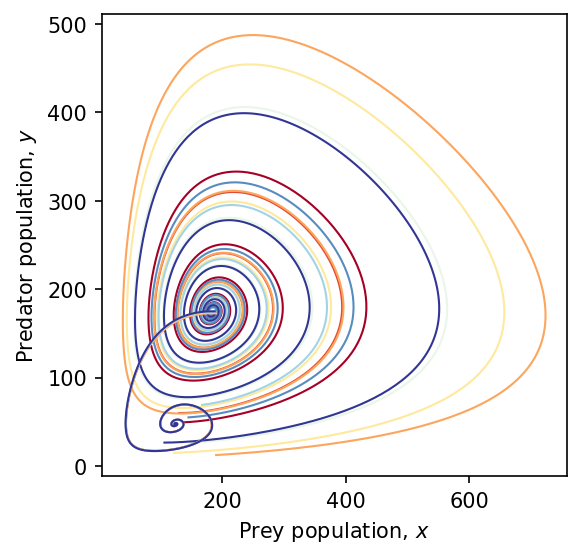

In [27]:
#Parameter sets from Lau, 2022. a and b are swapped relative to eariler
#exercises to be consistent with Lau
# a, b, c, d, h, K, m, z
STABLE = (0.01, 0.35, 0.6, 0.2, 0.44, 1900.0, 0.30, 0.0)
EXTINCTION = (0.61, 0.11, 0.8, 0.18, 0.18, 3100, 0.7, 0.0)
#CYCLES = (0.32, 0.48, 0.40, 0.16, 0.23, 2400, 0.30, 0.0) 
#CYCLES = (0.01, 0.76, 0.25, 0.5, 0.01, 5000, 0.00, 0.0)

CYCLES = (0.01, 0.35, 0.6, 0.2, 0.44, 1900.0, 0.00, 0.0)
HARVEST = 0.2

#change this between STABLE, EXTINCTION, CYCLES
param_vector = STABLE

def alt_pp_model(t_span, x_y_initial, param_vector):
    """ (Arditi and Akçakaya, 1990) PP model """
    def dxdt_lv_aa(t, xv, a, b, c, d, h, K, m, z ):
        x, y = xv
        predation = a*x*y/(y**m + a*h*x)
        dxdt = b*(1-x/K)*x - predation - z*x
        dydt = c*predation - d*y
        return [dxdt, dydt]
    sol = scipy.integrate.solve_ivp(dxdt_lv_aa, t_span, x_y_initial, args=param_vector,max_step=0.1)
    return sol.t, sol.y[0], sol.y[1]
                        
fig = plt.figure(figsize=(4,4), dpi = 150)
ax = fig.add_subplot(1, 1, 1)  
ax.set_ylabel(r'Predator population, $y$')
ax.set_xlabel(r'Prey population, $x$')  


time_span = (0,200)
print ('natural conditions')
x_end, y_end = pp_ensemble_ivp(alt_pp_model,time_span, param_vector, 8, (100,200), (10,100), ax=ax)
        
time_span = (0,500)   
if HARVEST > 1.0e-10: 
    print ('harvesting begins')
    p_harvest = list(param_vector)
    p_harvest[-1] = HARVEST
    x_end2, y_end2 = pp_ensemble_ivp(alt_pp_model,time_span, p_harvest, 4, (np.min(x_end), np.max(x_end)), (np.min(y_end), np.max(y_end)), ax=ax)    
    
    

## Next week

Glaciers.